In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
from scipy import stats
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib as mpl

from scipy.stats import chi2
import collections
from matplotlib import colors
import statistics as st
import seaborn as sns

In [2]:
#the data in this script is Discrete Data
#-Data can be counted but cannot be divided.
#-Data can be categorized into bins 
#probability mass function-assigns a probability to each possible value
#https://towardsdatascience.com/plotting-probabilities-for-discrete-and-continuous-random-variables-353c5bb62336

# Winning Numbers

In [3]:
#create a data set that contains all the winning numbers
data=[
[15,16,18,39,59],
[9,38,47,49,68],
[14,39,43,44,67],
[20,36,37,48,67],
[26,29,41,52,64],
[25,28,38,59,62],
[3,15,42,48,56],
[7,10,15,31,57],
[19,22,24,28,53],
[15,25,26,38,47],
[3,9,50,53,64],
[8,10,15,17,57],
[11,15,31,42,63],
[4,18,26,27,58],
[3,24,29,42,47],
[8,22,29,43,56],
[4,44,53,64,70],
[2,22,30,42,62],
[12,35,46,48,69],
[17,20,27,31,34],
[8,33,39,54,58],
[14,25,26,41,43],
[12,13,21,46,57],
[6,26,55,56,64],
[10,15,20,49,53],
[16,20,25,30,43],
[20,40,44,45,50],
[9,16,29,37,53],
[6,20,37,40,48],
[11,34,36,52,66],
[21,23,33,35,42],
[9,14,57,67,70],
[1,5,9,10,23],
[32,35,37,47,55],
[9,20,23,26,29],
[10,13,32,41,51],
[34,52,58,59,62],
[8,10,20,44,46],
[8,19,25,36,66],
[11,17,32,33,46],
[7,16,27,44,52],
[5,20,22,61,70],
[7,13,17,21,45],
[28,30,31,35,66],
[13,19,53,54,63],
[1,27,32,60,67],
     ]

In [4]:
#need to concatonate all the lists of numbers 
#list=list+x is the same as list+=x
#create an empty list and then loop through a sample of 30
# sample of 30 is enough for the central limit theorem(large data set normalizes the numbers) 
#could use ''.join()
lst=[]
for x in data[0:30]:
    lst+=x
#count the number of times a # occurs in lst
#then sort them
d={}
[ d.update( {i:d.get(i, 0)+1} ) for i in lst ]
sorted_d = sorted(d.items())
# sorted_d

###find the numbers that have not been called in the data set
#sort the list, and then look through a range from index 0 to 71
#Then if not in list return those numbers
lst.sort()
def find_missing(lst): 
    return [x for x in range(lst[0], lst[-1]+1)  if x not in lst]
print("Numbers have not been choosen")
print(find_missing(lst))

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
repeats = [
    item 
    for item, count in collections.Counter(lst).items() 
    if count == 2
]
print("Numbers that have been choosen only twice")
print(repeats)

Numbers have not been choosen
[5, 23, 32, 51, 60, 61, 65]
Numbers that have been choosen only twice
[4, 6, 11, 12, 14, 17, 18, 24, 27, 28, 30, 34, 36, 40, 41, 46, 49, 50, 52, 58, 59, 62, 67]


## Statisitics Examples

In [5]:
lst_sixty=lst[0:59]
print(st.mean(lst_sixty))
print(st.median(lst_sixty))
print(st.variance(lst_sixty))
print(st.stdev(lst_sixty))

14.932203389830509
15
47.54704850964348
6.8954367888947745


In [6]:
lst
print(st.mean(lst))
print(st.median(lst))
print(st.variance(lst))
print(st.stdev(lst))

33.766666666666666
33.5
336.596196868009
18.346558174982277


In [7]:
#null hyp: removing the numbers 60 to 70 will not effect the study
#alt hyp: removing the numbers 60 to 70 will have a positive effect on the study
#                                  I am playing with the numbers
#two independent samples from the same or different populations
#test measures whether the average (expected) value differs significantly across samples
#if p-value is below 0.05 then we can reject the null hypothesis
stats.ttest_ind(lst, lst_sixty, equal_var = False)

Ttest_indResult(statistic=10.784835439130747, pvalue=8.390122097130418e-22)

In [8]:
# t = observed difference between sample means / standard error of the difference between the means
# t = (mean(X1) - mean(X2)) / sed
# sed = sqrt(se1^2 + se2^2)
# se = std / sqrt(n)

In [9]:
#example of how to calculate probablility
probabilitiz=[]
for x in lst:
    probabilitiz.append(x/len(lst))

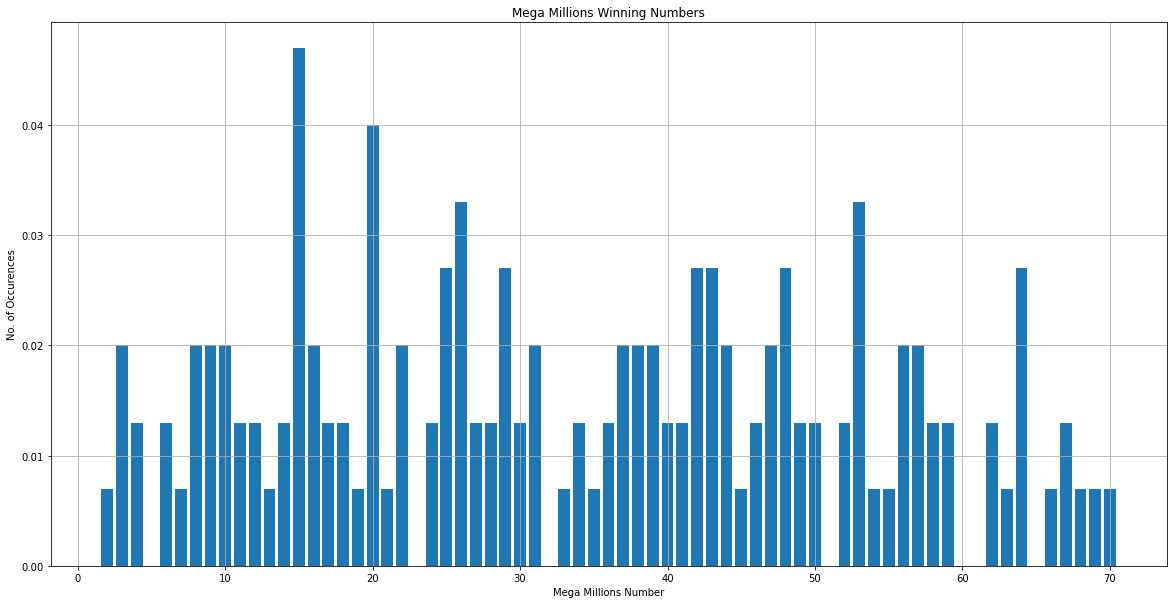

<Figure size 432x288 with 0 Axes>

In [10]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(sample, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(sample),3))
    return probs
sample = lst                                    #lst is the list of numbers that are sorted
freqs = frequencies(sample)                     # frequency is how often the number occurs
probs = probabilities(sample, freqs)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(sample))                      # x_axis just counts the numbers from 1 to 70
fig = plt.figure(figsize = (20, 10))
plt.bar(x_axis, probs)
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))


plt.xlabel("Mega Millions Number") 
plt.ylabel("No. of Occurences") 
plt.title("Mega Millions Winning Numbers") 
plt.grid()

plt.show() 
plt.savefig("Images/MegaMillionsProbabilityBar.png", bbox_inches='tight')

In [11]:
# dict(zip(x_axis, probs))

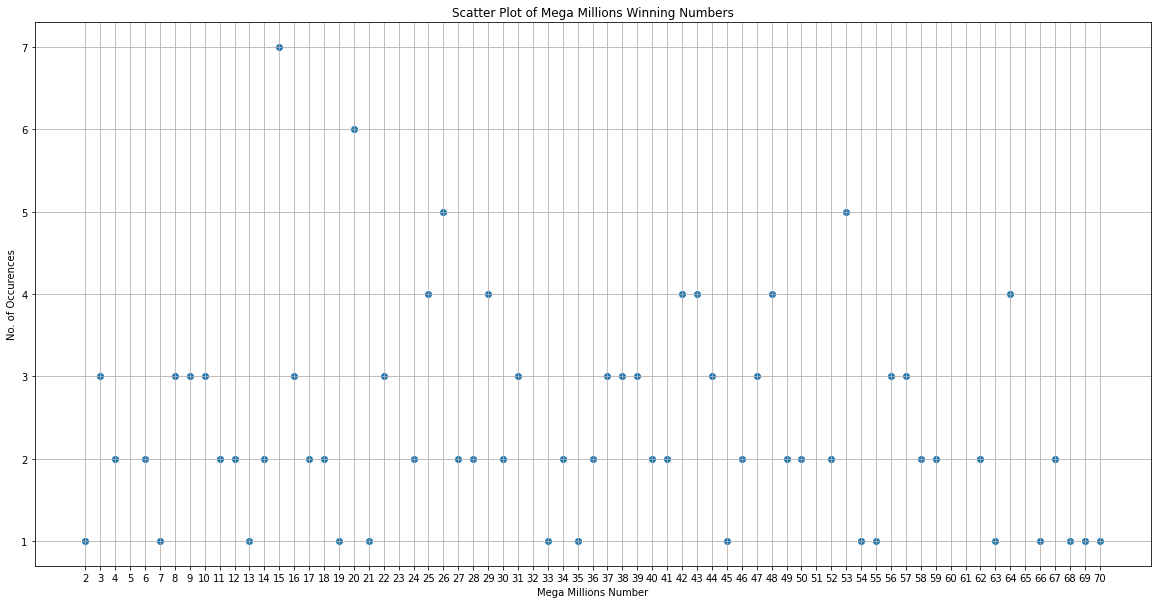

In [40]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_d)
#plot the # vs the number of occurces
# x=list(range(1, 71))
fig = plt.figure(figsize = (20, 10))
plt.scatter(*zip(*sorted_d))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(rotation=70)

plt.xlabel("Mega Millions Number") 
plt.ylabel("No. of Occurences") 
plt.title("Scatter Plot of Mega Millions Winning Numbers") 
plt.grid()
 # Call save fig beforee plt.show 
plt.savefig("Images/MegaMillions_Scatter.png", bbox_inches='tight')
plt.show()

### Bins and Quartiles

In [13]:
#Quartile cut to 25%, 50%, and 75%
#dont define the bins
# define the number of quantiles and let pandas figure out how to divide up the data.
# lst = pd.qcut(df['ext price'], q=4) #save it back in the original df
Qcuts=pd.qcut(lst, q=4)
Qcuts.value_counts()
#there should be an equal amount of observations per bin bc Pandas is doing the math to figure out width

(1.999, 18.0]    39
(18.0, 33.5]     36
(33.5, 48.0]     39
(48.0, 70.0]     36
dtype: int64

In [14]:
# cut and bin
#define the bins
pd.cut(lst, bins=4).value_counts()

(1.932, 19.0]    40
(19.0, 36.0]     40
(36.0, 53.0]     45
(53.0, 70.0]     25
dtype: int64

In [15]:
cut_bins = [0, 10, 20, 30, 40,50,60,70]
Cut_lst = pd.cut(lst, bins=cut_bins)
Cut_lst

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (60, 70], (60, 70], (60, 70], (60, 70], (60, 70]]
Length: 150
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [16]:
#linespace to provide an array of evenly spaced bins over a specified range
pd.cut(lst, bins=np.linspace(0, 70, 8))

[(0.0, 10.0], (0.0, 10.0], (0.0, 10.0], (0.0, 10.0], (0.0, 10.0], ..., (60.0, 70.0], (60.0, 70.0], (60.0, 70.0], (60.0, 70.0], (60.0, 70.0]]
Length: 150
Categories (7, interval[float64]): [(0.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0]]

In [17]:
#use interval range for numbers and date ranges but cannot label bins
interval_range = pd.interval_range(start=0, freq=10, end=70)
lst_interval = pd.cut(lst, bins=interval_range, labels=[1,2,3])
lst_interval

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (60, 70], (60, 70], (60, 70], (60, 70], (60, 70]]
Length: 150
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

### Statistics

In [18]:
stdev = st.pstdev(lst)
stdev

18.28530071456913

In [19]:
variance = st.pvariance(lst)
variance

334.3522222222222

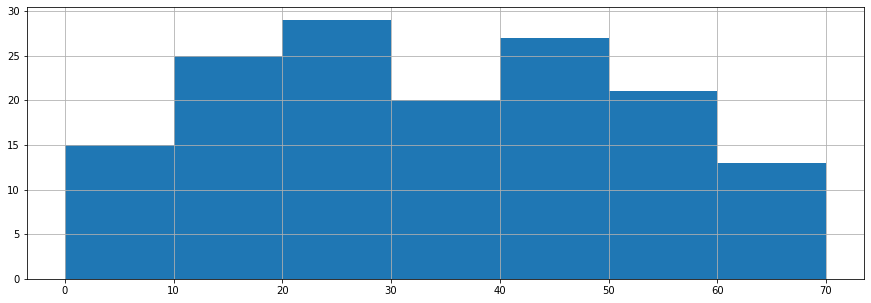

In [20]:
#frequency
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70])   
plt.grid()
plt.savefig("Images/MegaMillions_BinFrequency.png", bbox_inches='tight')

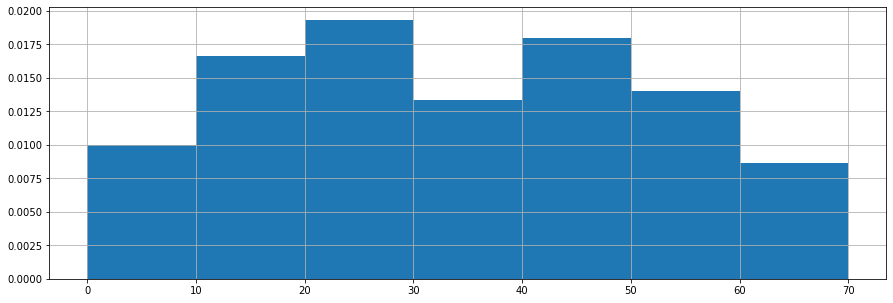

In [21]:
#Probablility
#The probability adds up to 100% because we have to multiply the probability of each of the bins by 5
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70], density=True )    #density=True to convert to probablilities
plt.grid()
plt.savefig("Images/MegaMillionsBinProbability.png", bbox_inches='tight')

# Gold Number

In [36]:
gold=[17,25,19,16,12,11,22,13,21,25,22,1,12,14,23,13,9,3,20,23,19,17,15,21,22,22,18,24,11,15,7,6,2,22,22,8,3,4,18,9,25,5,4,14,14,17,18]
#gold_list is 30 samples of winning numbers
gold_list=gold[0:30]
#create a dictionary and count occurances in gold_list
g={}
[ g.update( {i:g.get(i, 0)+1} ) for i in gold_list ]
#sort the list
sorted_g=sorted(g.items())

gold_list.sort()
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
print(find_missing(gold_list))

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
repeats = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count == 2
]
print(repeats)

[2, 4, 5, 6, 7, 8, 10]
[11, 12, 13, 15, 17, 19, 21, 23, 25]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

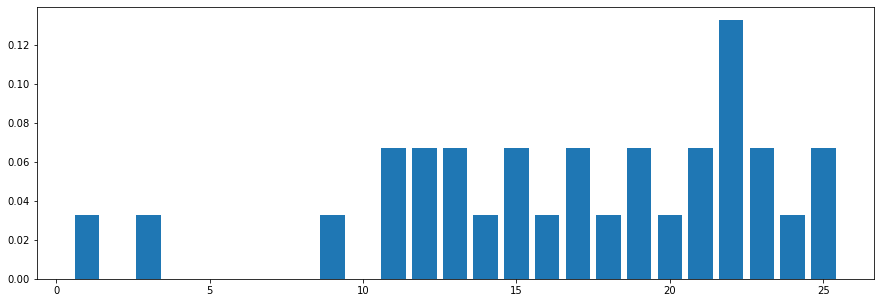

In [37]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(samp, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(samp),3))
    return probs
samp = gold_list                              #lst is the list of numbers that are sorted
freqs = frequencies(samp)                     # frequency is how often the number occurs
probs = probabilities(samp, freqs)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(samp))                      # x_axis just counts the numbers from 1 to 70
fig = plt.figure(figsize = (15, 5))
plt.bar(x_axis, probs)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig("Images/GoldBar.png", bbox_inches='tight')

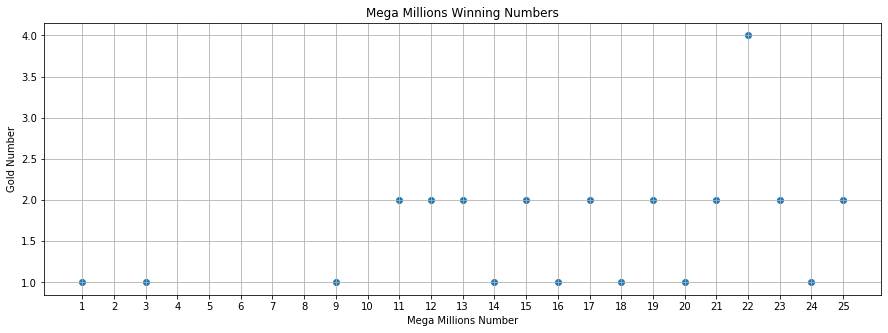

<Figure size 432x288 with 0 Axes>

In [24]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_g)
#plot the # vs the number of occurces
fig = plt.figure(figsize = (15, 5))
plt.scatter(*zip(*sorted_g))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.yticks(0,5)
# plt.xticks(rotation=70)

plt.xlabel("Mega Millions Number") 
plt.ylabel("Gold Number") 
plt.title("Mega Millions Winning Numbers") 
plt.grid()
plt.show() 
plt.savefig("MegaMillionsGold.png", bbox_inches='tight')
plt.savefig("Images/GoldScatter.png", bbox_inches='tight')

In [25]:
Qcutsg=pd.qcut(gold_list, q=4)
Qcutsg.value_counts()

(0.999, 13.0]     9
(13.0, 17.5]      6
(17.5, 22.0]     10
(22.0, 25.0]      5
dtype: int64

In [26]:
#define the bins
pd.cut(gold_list, bins=4).value_counts()

(0.976, 7.0]     2
(7.0, 13.0]      7
(13.0, 19.0]     9
(19.0, 25.0]    12
dtype: int64

In [27]:
cut_binsg = [0, 5,10,15,20,25]
Cut_lstg = pd.cut(gold_list, bins=cut_bins)
Cut_lstg

[(0, 10], (0, 10], (0, 10], (10, 20], (10, 20], ..., (20, 30], (20, 30], (20, 30], (20, 30], (20, 30]]
Length: 30
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [28]:
#linespace to provide an array of evenly spaced bins over a specified range
binz=pd.cut(gold_list, bins=np.linspace(0, 25, 6))

In [29]:
#use interval range for numbers and date ranges but cannot label bins
interval_range = pd.interval_range(start=0, freq=5, end=25)
lst_interval = pd.cut(gold_list, bins=interval_range, labels=[1,2,3])
lst_interval

[(0, 5], (0, 5], (5, 10], (10, 15], (10, 15], ..., (20, 25], (20, 25], (20, 25], (20, 25], (20, 25]]
Length: 30
Categories (5, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25]]

In [30]:
stdevg = st.pstdev(gold_list)
stdevg

6.017105247172893

In [31]:
varianceg = st.pvariance(gold_list)
variance

334.3522222222222

In [32]:
binz[0]

Interval(0.0, 5.0, closed='right')

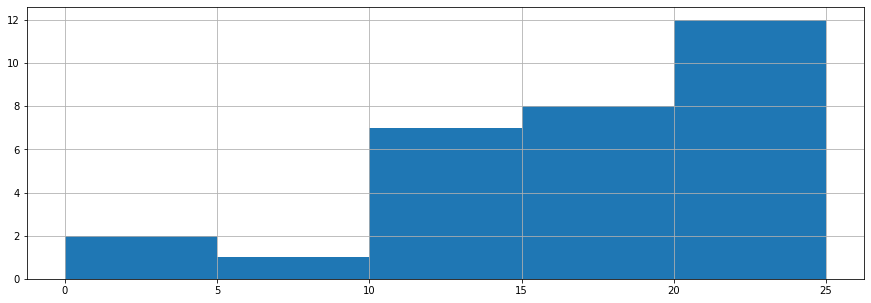

In [33]:
#frequency
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25])
# binwidth=5
# plt.hist(gold_list, bins=range(min(data), max(data) + binwidth, binwidth))#intergers only
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))#for floats use
plt.grid()
plt.savefig("Images/GoldBinFrequency.png", bbox_inches='tight')

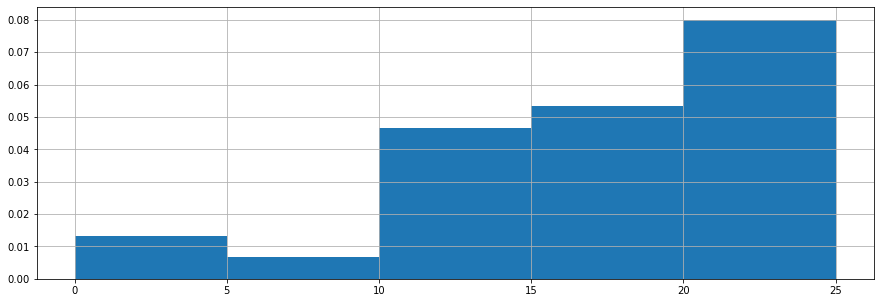

In [34]:
#Probability
#The probability adds up to 100% because we have to multiply the probability of each of the bins by 5
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25], density=True)          #density=True to get probabilities
# binwidth=5
# plt.hist(gold_list, bins=range(min(data), max(data) + binwidth, binwidth))#intergers only
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))#for floats use
plt.grid()
plt.savefig("Images/GoldBinProbability.png", bbox_inches='tight')

ValueError: operands could not be broadcast together with shapes (30,) (3,) 

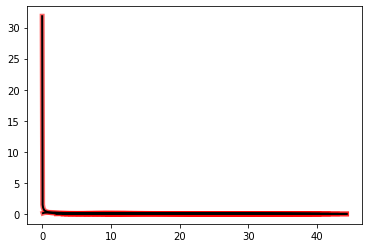

In [35]:
fig, ax = plt.subplots(1, 1)
df_chi=gold_list

mean, var, skew, kurt = chi2.stats(df_chi, moments='mvsk')
x = np.linspace(chi2.ppf(0.01, df_chi),                           #probability density function (pdf):
                chi2.ppf(0.99, df_chi), 100)
ax.plot(x, chi2.pdf(x, df_chi),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

rv = chi2(df_chi)                                                 #Alt method:call distribution object(as a function) 
#Freeze the distribution and display the frozen pdf:                #to fix the shape, location and scale parameters
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')                #This returns a “frozen” RV object holding the given parameters fixed

vals = chi2.ppf([0.001, 0.5, 0.999], df_chi)                      #Check accuracy of cdf and ppf:
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df_chi))          #Check accuracy of cdf and ppf:

r = chi2.rvs(df_chi, size=1000)                                   #Generate random numbers:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)           #And compare the histogram:
ax.legend(loc='best', frameon=False)
plt.show()


In [ ]:
gold_list_chi = chi2.gold_list 
[a] = [0.6, ] * gold_list_chi 
rv = chi2(a) 
print ("RV : \n", rv) 

In [ ]:
quantile = np.arange (0.01, 1, 0.1)    
# Random Variates 
R = chi2.rvs(a, scale = 2,  size = 10) 
print ("Random Variates : \n", R) 
  
# PDF 
R = chi2.pdf(a, quantile, loc = 0, scale = 1) 
print ("\nProbability Distribution : \n", R)

In [ ]:
distribution = np.linspace(0, np.minimum(rv.dist.b, 5)) 
print("Distribution : \n", distribution) 
plot = plt.plot(distribution, rv.pdf(distribution)) 

In [ ]:
x = np.linspace(0, 5, 100)  
# Varying positional arguments 
y1 = chi2.pdf(x, 1, 6) 
y2 = chi2.pdf(x, 1, 4) 
plt.plot(x, y1, "*", x, y2, "r--") 